In [1]:
import numpy as np # array operations
import cv2 #opencv library read img operations

# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table

# 產生 random seed
import random
import math

In [2]:
# 加密
def embedding(n:int,digit_ary:int,cover_img:np.ndarray,secret_digit:int):
    #digit_ary=2*n+1
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    f=f % digit_ary
    s=(secret_digit-f) % digit_ary
    if(s!=0):#s=0 不用變動
        if(s<=n):
            cover_img[s-1]=cover_img[s-1]+1
            if(cover_img[s-1]>255 or cover_img[s-1]<0):
                if(cover_img[s-1]>255):
                    cover_img[s-1]=cover_img[s-1]-2
                else:
                    cover_img[s-1]=cover_img[s-1]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        else:
            change_index=digit_ary-s-1
            cover_img[change_index]=cover_img[change_index]-1
            if(cover_img[change_index]>255 or cover_img[change_index]<0):
                if(cover_img[change_index]>255):
                    cover_img[change_index]=cover_img[change_index]-2
                else:
                    cover_img[change_index]=cover_img[change_index]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        
    return cover_img
# embedding(n=4,digit_ary=9,cover_img=[14,13,9,4],secret_digit=7)

In [3]:
# 解密
def extraction(n:int,digit_ary:int,cover_img:np.ndarray):
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    secret_digit=f % digit_ary
    return secret_digit
# extraction(n=4, digit_ary=9,cover_img=[14, 13, 9, 3])

In [4]:
def output_secret_txt(secret_digit:np.ndarray):
    path = 'secret_digit.txt'
    f = open(path, 'w', encoding="utf-8")
    for i in range(len(secret_digit)):
        f.write(str('{}{:d}'.format(" ",secret_digit[i])))
#         f.write(str('{:2d}'.format(secret_digit[i])))
#         print(str(secret_digit[i]), end=' \t',file=f)
#         f.write(temp)
    f.close()

(512, 768)
(768,)
[[114 115 117 ...  39  39  43]
 [117 117 118 ...  43  43  39]
 [120 120 122 ...  43  39  39]
 ...
 [ 74  74  78 ...  66  56  50]
 [ 74  74  74 ...  64  53  53]
 [  0   0   0 ...   0   0   0]]
(393216,)


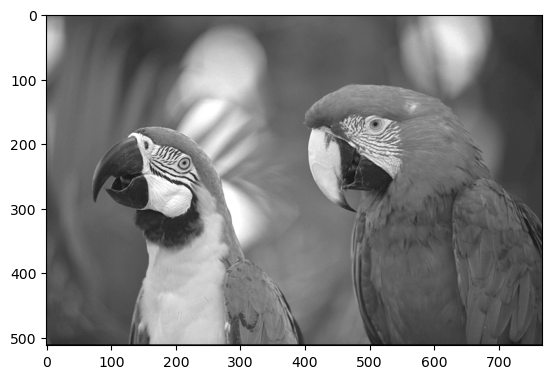

In [5]:
# cover imgPath
imgPath = 'cover-kodak-1.png'
# convert img to array 以灰階格式讀取(二維)
cover_gray = cv2.imread(imgPath ,cv2.IMREAD_GRAYSCALE)   
print(cover_gray.shape)
print(cover_gray[0].shape)
print(cover_gray)

# 轉為一維
cover_temp=cover_gray.reshape(-1,)
print(cover_temp.shape)

# 印出圖片
plt.subplot(111)
plt.imshow(cover_gray,cmap = 'gray')
plt.show()

In [6]:
n = input("Input number of pixels in a group (n>=2 but n<= MxN):")
n=int(n)
digit_ary=2*n+1
# pixels 總數: len(cover_temp) / 一組n個 = 組數
seedSize=math.floor(len(cover_temp)/n)
print(seedSize)
np.random.seed(100)
secret_digit=np.random.randint(2*n, size=seedSize)
output_secret_txt(secret_digit)

Input number of pixels in a group (n>=2 but n<= MxN):4
98304


In [7]:
cover_EMD=cover_temp.copy()
index=0
for i in range(seedSize):
    cover_EMD[index:index+n]=embedding(n=n,digit_ary=digit_ary,cover_img=cover_temp[index:index+n],secret_digit=secret_digit[i])
    index+=n

In [8]:
secret=[]
index=0
for i in range(seedSize):
    secret.append(extraction(n=n, digit_ary=digit_ary,cover_img=cover_EMD[index:index+n]))
    index+=n
print("extract secret: ",secret)

extract secret:  [0, 0, 3, 7, 7, 7, 0, 2, 6, 4, 2, 5, 2, 2, 6, 2, 1, 0, 0, 7, 4, 3, 4, 2, 0, 3, 1, 5, 6, 2, 3, 4, 4, 7, 1, 5, 5, 3, 4, 4, 3, 3, 3, 7, 1, 7, 1, 5, 6, 7, 7, 3, 0, 2, 1, 1, 6, 3, 2, 7, 5, 3, 0, 6, 1, 6, 0, 7, 7, 5, 6, 4, 2, 0, 0, 2, 5, 2, 1, 0, 5, 2, 6, 1, 5, 4, 2, 0, 3, 3, 3, 5, 6, 0, 5, 1, 4, 2, 3, 6, 3, 4, 7, 2, 7, 6, 7, 4, 3, 1, 0, 4, 3, 4, 5, 7, 6, 6, 6, 2, 2, 4, 7, 2, 5, 7, 4, 1, 2, 6, 2, 6, 0, 2, 7, 2, 3, 5, 4, 6, 2, 4, 3, 7, 5, 1, 0, 0, 5, 1, 6, 6, 5, 6, 2, 4, 2, 7, 3, 6, 3, 6, 1, 2, 3, 0, 7, 1, 5, 7, 5, 1, 5, 3, 0, 4, 6, 2, 5, 4, 3, 4, 7, 4, 2, 0, 1, 0, 6, 4, 5, 2, 5, 7, 4, 4, 5, 1, 7, 0, 1, 0, 6, 4, 2, 0, 5, 3, 2, 2, 3, 6, 6, 6, 5, 4, 1, 6, 3, 1, 4, 0, 0, 5, 2, 4, 2, 2, 7, 6, 2, 7, 1, 2, 7, 1, 5, 2, 2, 5, 0, 2, 5, 6, 3, 4, 5, 2, 6, 1, 2, 5, 1, 5, 1, 2, 7, 4, 2, 3, 5, 4, 6, 4, 6, 7, 1, 7, 3, 0, 2, 5, 2, 5, 1, 1, 2, 5, 4, 7, 0, 3, 6, 7, 3, 6, 4, 2, 5, 0, 6, 5, 0, 0, 5, 1, 3, 2, 6, 3, 1, 0, 6, 5, 2, 0, 7, 0, 1, 1, 5, 7, 2, 3, 6, 3, 1, 5, 4, 5, 3, 2, 1, 4, 4, 1, 7, 5

(512, 768)
[[114 116 117 ...  39  39  43]
 [117 116 118 ...  43  43  40]
 [120 120 122 ...  43  39  39]
 ...
 [ 75  74  78 ...  66  56  50]
 [ 75  74  74 ...  64  53  54]
 [  0   0   1 ...   1   0   0]]


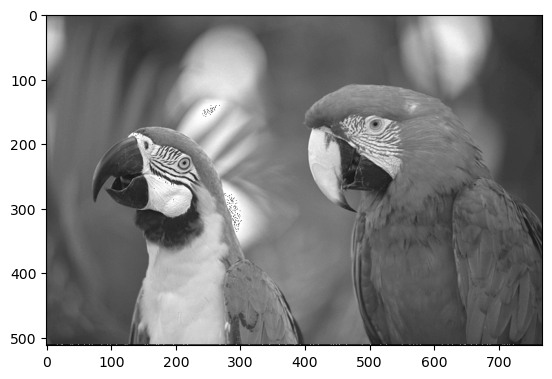

In [9]:
# 轉回二維
cover_return=cover_EMD.reshape(cover_gray.shape,)
print(cover_return.shape)
print(cover_return)

# 印出圖片
plt.subplot(111)
plt.imshow(cover_return,cmap = 'gray')
plt.show()

In [10]:
# 存顏色轉換結果圖
# cover_return = cv2.cvtColor(cover_return,cv2.COLOR_RGB2BGR)
cv2.imwrite('stego-kodak-1.png', cover_return)

True

In [47]:
embedding(n=4,digit_ary=9,cover_img=[14,13,9,4],secret_digit=7)

[14, 13, 9, 3]

In [54]:
embedding(n=4,digit_ary=9,cover_img=[255,255,255,254],secret_digit=0)

[254, 254, 255, 255]

In [71]:
embedding(n=4,digit_ary=9,cover_img=[1,0,0,0],secret_digit=6)

3


[2, 0, 0, 1]

In [55]:
extraction(n=4, digit_ary=9,cover_img=[254, 254, 255, 255])

0

In [72]:
extraction(n=4, digit_ary=9,cover_img=[2, 0, 0, 1])

6